# (1). Data Load

In [14]:
import pandas as pd
import numpy as np
train=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\파이썬으로 시작하는 캐글\data\Titanic_data\train.csv")
test=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\파이썬으로 시작하는 캐글\data\Titanic_data\test.csv")
gender_submission=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\파이썬으로 시작하는 캐글\data\Titanic_data\gender_submission.csv")

# (2). 데이터 개요 확인하기 (pandas_profiling())

In [15]:
import pandas_profiling #pip insctall pandas_profiling필요

# train.profile_report()

Survived : 사망(0), 생존(1)

Age : 나이

SibSp : 동승자 수 (형제/자매, 배우자)

Parch : 동승 부모, 아이의 인원 수

Fare : 운임

Pclass : 티켓의 클래스

Sex : 성별

Ticket : 티켓 번호

Cabin : 객실 번호

Embarkded : 승선한 항구

Name : 승선자 이름

# (3). 특성과 목적변수(survived)와의 관계

### 1. Age와 survived의 관계 확인

(matplotlib의 hist 함수 사용)

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

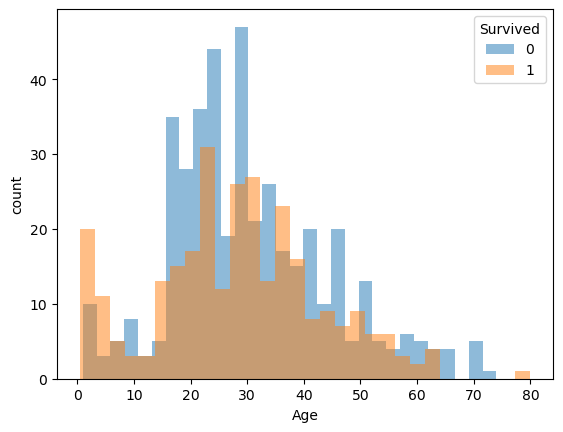

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(train.loc[train['Survived']==0, 'Age'].dropna(),   # train set에서 생존=0인 행에서 'Age'열값만 가져온 데이터 프레임, 결측치있는 행은 제거, 
         bins=30, alpha=0.5, label='0')                     # 히스토그램 설정(bin=구간의 개수, alpha=투명도, label=범례에 표시될 라벨)

plt.hist(train.loc[train['Survived']==1, 'Age'].dropna(),   # train set에서 행을 추출, [생존=0, 나이]인 행, 결측치있는 행은 제거, 
         bins=30, alpha=0.5, label='1')

plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')


train.loc[train['Survived']==0, 'Age']
#데이터프레임.loc(조건, 값을 뽑아올 열이름)         # loc : location
#데이터프레임.iloc(행 인덱스, 열 인덱스)            # iloc : index location (정수 인덱스)

In [17]:
train['Age'].corr(train['Survived'])

-0.0772210945721776

In [18]:
train['Parch'].corr(train['SibSp'])

0.4148376986201568

### 2. SibSp와 survived관계 확인

(seaborn 라이브러리 사용)

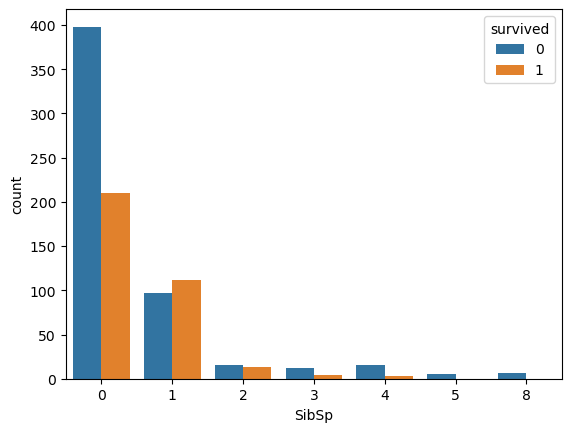

In [19]:
import seaborn as sns

sns.countplot(x='SibSp', hue='Survived', data=train)
plt.legend(loc='upper right', title='survived')


# x='SibSp' -> x축에 표시될 열
# hue='Survived' -> 데이터를 그룹화할 열
# data=train -> 사용할 데이터 프레임

# plt.legend -> 범례설정 (loc='upper right' : 우측상단에 표시, title='survived' : 범례 제목)

### 3. Parch와 survived관계 확인

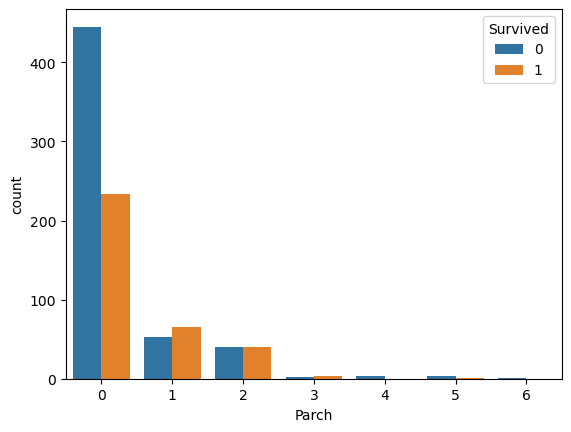

In [20]:
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')

### 4. Fare와 목적 변수와의 관계

Parch, SibsP : 가족과 관련된 변수

-> 가족이 많아질 수록 생존한 사람이 적어졌다

=> 가족 수라는 특징을 만들면 예측 성능이 높아질 수 있음 (밑에 파생변수 생성)

(-5.0, 250.0)

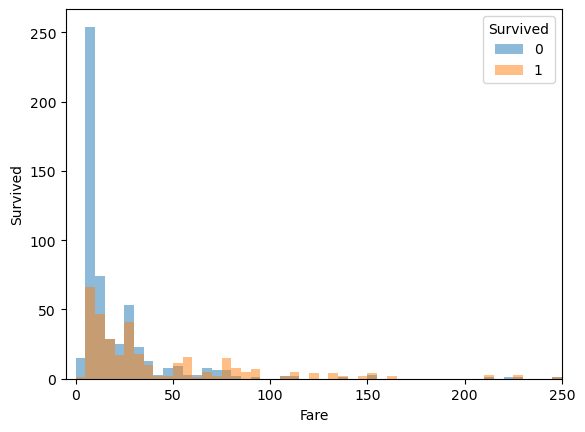

In [21]:
plt.hist(train.loc[train['Survived']==0, 'Fare'].dropna(),
         range=(0,250),bins=50, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived']==1, 'Fare'].dropna(),
         range=(0,250),bins=50, alpha=0.5, label='1')

plt.xlabel('Fare')
plt.ylabel('Survived')
plt.legend(title='Survived')
plt.xlim(-5, 250)

#range=(0,250) : 히스토그램을 그릴 범위 (Fare의 값 : 0~250까지)
#plt.xlim(-5,250) : 히스토그램의 x축 범위 : -5~250


### 5. Sex와 survived의 관계

<AxesSubplot:xlabel='Sex', ylabel='count'>

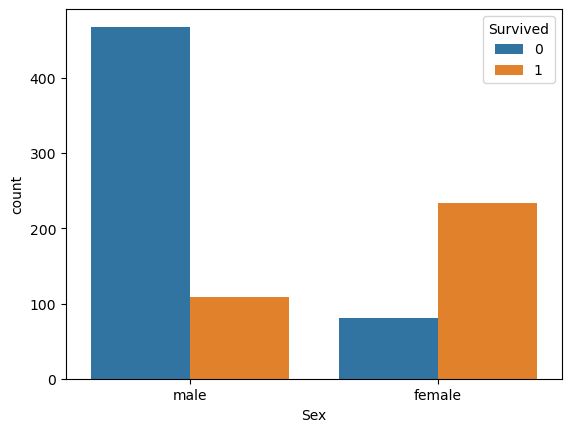

In [22]:
# import seaborn as sns (matplotlib을 기반으로 좀 더 고급화된 통계, 그래픽 테마)
sns.countplot(x='Sex', hue='Survived', data=train)

남성의 생존률 > 여성의 생존률

### 6. Embarked 와 survived의 관계

<AxesSubplot:xlabel='Embarked', ylabel='count'>

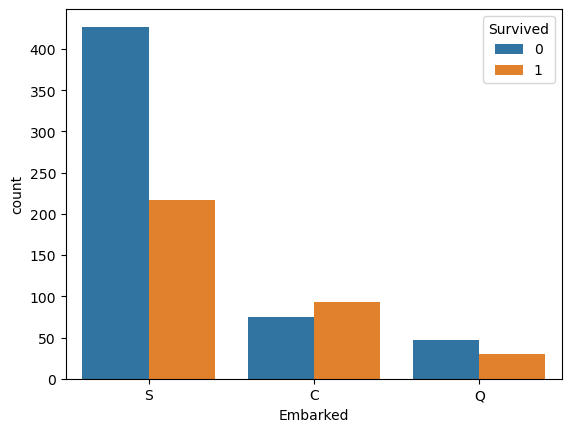

In [23]:
sns.countplot(x='Embarked', hue='Survived', data=train)

### 7. 결측치가 대다수인 특성은 drop

In [24]:
print("결측치 총 개수: ", train['Cabin'].isnull().sum())
print("총 레코드 수: ", len(train))

결측치 총 개수:  687
총 레코드 수:  891


=> 결측값이 대다수이므로 drop!

# (4). 파생 변수 생성, 시각화로 확인

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

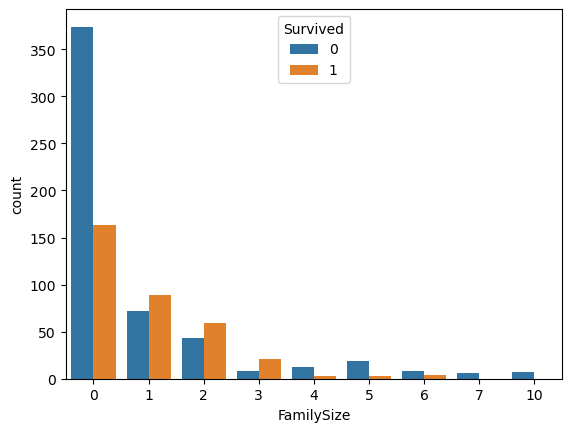

In [25]:
import seaborn as sns

train['FamilySize']=train['Parch']+ train['SibSp']# 가족 구성원 + 본인(+1)
# train['FamilySize']=data['FamilySize'][:len(train)]
# test['FamilySize']=data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', hue='Survived',data=train)

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

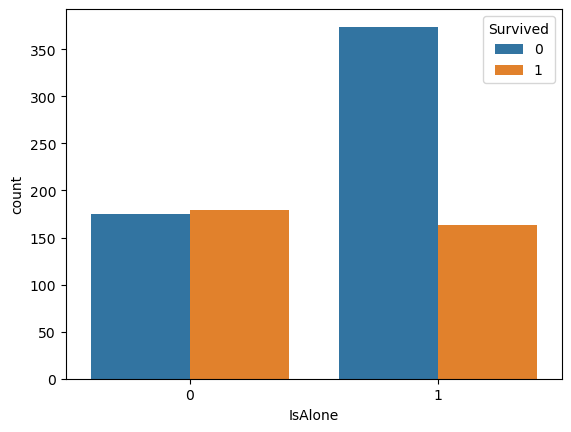

In [26]:
train['IsAlone']=0
train.loc[train['FamilySize']==0, 'IsAlone']=1

sns.countplot(x='IsAlone', hue='Survived', data=train)